<h3>
Data Analysis for given datasets:
</h3>

In [62]:
import csv
import string
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

In [63]:
data_file1 = "./data/D1.csv"; # filepath for data1
data_file2 = "./data/D2.csv"; # filepath for data2

stopwords_set = set(stopwords.words('english'))

<h4> Step1: </h4>
<p>Remove special characters in the data and tokenize.</p>

In [64]:
def read_data(file):
  '''
  Read the csv file and return a string for each post
  '''
  all_posts = [];
  with open(file, "rt", encoding="utf8") as datafile:
    next(datafile)
    csvreader = csv.reader(datafile)
    for row in csvreader:
      all_posts.append(", ".join(row))
  return all_posts

def tokenize(corpus, stop_words=False):
  '''
  tokenize by removing special characters and punctuation marks
  '''
  corpus_tokens = []
  for doc in corpus:
    doc = doc.lower()
    #remove the punctuation using the character deletion step of translate
    no_punctuation = doc.translate(str.maketrans('','', string.punctuation))
    text_tokens = list(word_tokenize(no_punctuation))
    if stop_words:
      text_tokens = filter(lambda token: token not in stopwords_set, text_tokens)
    corpus_tokens.append(text_tokens)
  
  return corpus_tokens

In [65]:
raw_data1 = read_data(data_file1)
raw_data2 = read_data(data_file2)

corpus1 = tokenize(raw_data1)
corpus2 = tokenize(raw_data2)

<h4> Step2: </h4>

<p> Analyze the most and less frequent tokens entire corpus.</p>
<p> Instead of considering last k frequent, we consider a fixed head size and then see bottom k of it. </p>

In [66]:
def count_analysis(corpus, head=10000, k=10):
  '''
  Create a frequency distribution and give the
  1. Number of unique tokens
  2. top k tokens based on frequency
  3. bottom k tokens in top 'head' tokens
  '''
  data = [token for doc in corpus for token in doc] # Create one big list for entire corpus
  
  print("Total number of tokens: " + str(len(data)))
  
  fdist = FreqDist(data)
  print("Number of unique tokens in data: " + str(len(fdist)))
  
  print("Top {} tokens based on frequency : {} \n".format(k,str(fdist.most_common(k))))
  
  bottom_k_top_head = fdist.most_common(head)[-k:]
  print("Bottom {} tokens in top {} : {} \n".format(k,head,str(bottom_k_top_head)))

<h4> Observations: </h4>
<ol>
<li> By trail and error, we can see that for 20,000 head size in dataset1 and for 70,000 head size in dataset2, all words occured only once in entire corpus. </li>
    <li> We can also observe that all frequent words are stop words </li>
</ol>

In [45]:
print("\n -- Token Analysis for dataset 1: -- \n")
count_analysis(corpus1, head=20000)

print("\n -- Token Analysis for dataset 2: -- \n")
count_analysis(corpus2, head=70000)


 -- Token Analysis for dataset 1: -- 

Total number of tokens: 472014
Number of unique tokens in data: 36838
Top 10 tokens based on frequency : [('the', 22381), ('to', 13581), ('a', 12981), ('of', 10976), ('and', 8751), ('is', 8487), ('in', 7008), ('i', 6755), ('that', 5348), ('for', 4967)] 

Bottom 10 tokens in top 20000 : [('poc', 1), ('costfunction', 1), ('overexposure', 1), ('ebook', 1), ('hrefhttpsgistgithubcomhartgerv50ccdb999393eb1fd2b50725e14cd0fa', 1), ('noreferrermost', 1), ('commmon', 1), ('tokensa', 1), ('professorsresearchers', 1), ('codefcncode', 1)] 


 -- Token Analysis for dataset 2: -- 

Total number of tokens: 5552409
Number of unique tokens in data: 179877
Top 10 tokens based on frequency : [('the', 221112), ('to', 185618), ('i', 173353), ('a', 114690), ('and', 101861), ('it', 86040), ('is', 82292), ('my', 81074), ('on', 64451), ('in', 57777)] 

Bottom 10 tokens in top 70000 : [('gids3002', 1), ('xx3115953', 1), ('upgraderreceiver', 1), ('cacheblurversion45608a956v

<p> Lets analyze after removing stop words. </p>

In [49]:
corpus1_wo_stop_words = tokenize(raw_data1, stop_words=True) # Corpus 1 without stop words
print("\n -- Token Analysis for dataset 1 (after removing stop words): -- \n")
count_analysis(corpus1_wo_stop_words, head=15000)

corpus2_wo_stop_words = tokenize(raw_data2, stop_words=True) # Corpus 2 without stop words
print("\n -- Token Analysis for dataset 2 (after removing stop words): -- \n")
count_analysis(corpus2_wo_stop_words, head=60000)


 -- Token Analysis for dataset 1 (after removing stop words): -- 

Total number of tokens: 277844
Number of unique tokens in data: 36700
Top 10 tokens based on frequency : [('p', 2116), ('pi', 1921), ('would', 1837), ('ai', 1827), ('learning', 1681), ('neural', 1629), ('network', 1590), ('relnofollow', 1429), ('like', 1275), ('one', 1247)] 

Bottom 10 tokens in top 15000 : [('alternativelybiased', 1), ('confidentialityp', 1), ('nonmathcs', 1), ('supplements', 1), ('metapost', 1), ('satiate', 1), ('curiositiesp', 1), ('nonmath', 1), ('hrefhttpwwwalicebotorgarticleswallaceelizahtml', 1), ('relnofollowfrom', 1)] 


 -- Token Analysis for dataset 2 (after removing stop words): -- 

Total number of tokens: 3241068
Number of unique tokens in data: 179731
Top 10 tokens based on frequency : [('phone', 45625), ('android', 41256), ('pi', 40232), ('app', 25174), ('p', 23686), ('device', 19952), ('google', 18950), ('apps', 16791), ('using', 16197), ('get', 14585)] 

Bottom 10 tokens in top 60000 

<h4> Step3: </h4>
<p> Analyze the posts(documents) sizes. </p>
<p> Plot histogram for the frequency of posts lengths and show the average post length frequency in it. </p>

In [71]:
def doc_analysis(corpus, num_bins=100):
  post_lengths = list(map(lambda doc: len(doc), corpus))
  print("length of corpus:",len(post_lengths),
        "\naverage post length", np.average(post_lengths),
        "\nminimum post length", min(post_lengths),
        "\nmaximum post length", max(post_lengths))
  
  # plot a histogram of posts length
  fig, ax = plt.subplots(figsize=(12,6));
  # the histogram of the data
  n, bins, patches = ax.hist(post_lengths, num_bins)
  print("n : " + str(n))
  print("bins : " + str(bins))
  ax.set_xlabel('Post Length (tokens)', fontsize=15)
  ax.set_ylabel('Frequency', fontsize=15)
  ax.grid()
  (y_min, y_max) = ax.get_ylim()
  ax.plot([np.average(post_lengths) for i in np.linspace(0.0, y_max,100)], np.linspace(0.0,y_max,100), '-',label='average post length')
  ax.legend()
  ax.grid()
  fig.tight_layout()
  plt.show()

#### Document Length Analysis for Dataset1:

length of corpus: 3126 
average post length 150.99616122840692 
minimum post length 14 
maximum post length 2409
n : [205. 464. 449. 421. 348. 238. 189. 140. 123. 104.  68.  54.  53.  59.
  43.  24.  22.  14.  11.  13.  12.  11.   6.  10.   5.   1.   4.   3.
   1.   3.   5.   3.   3.   2.   1.   2.   1.   0.   0.   1.   1.   0.
   0.   0.   1.   1.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.
   1.   0.   0.   0.   0.   0.   1.   1.   0.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.]
bins : [  14.     37.95   61.9    85.85  109.8   133.75  157.7   181.65  205.6
  229.55  253.5   277.45  301.4   325.35  349.3   373.25  397.2   421.15
  445.1   469.05  493.    516.95  540.9   564.85  588.8   612.75  636.7
  660.65  684.6   708.55  732.5   756.45  780.4   804.35  828.3   852.25
  876.2   900.15  924.1   948.05  972.    995.95 1019.9  1043.85 1067.8
 1091

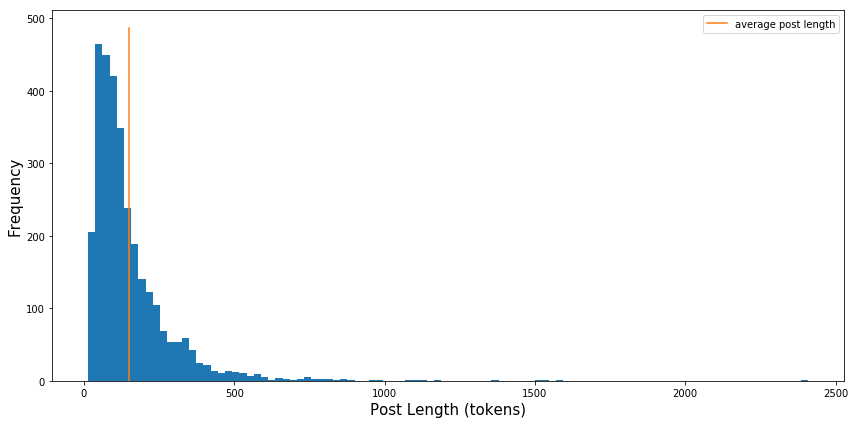

In [72]:
doc_analysis(corpus1, num_bins=100)

#### Document Length Analysis for Dataset2:

length of corpus: 49784 
average post length 111.52998955487706 
minimum post length 10 
maximum post length 3533
n : [6.8050e+03 1.5479e+04 1.1082e+04 6.5210e+03 3.8620e+03 2.1060e+03
 1.2710e+03 8.1100e+02 5.3000e+02 3.6500e+02 2.3800e+02 1.5900e+02
 1.1200e+02 8.3000e+01 7.2000e+01 5.2000e+01 3.4000e+01 3.1000e+01
 1.9000e+01 1.7000e+01 1.6000e+01 1.6000e+01 1.6000e+01 5.0000e+00
 5.0000e+00 9.0000e+00 5.0000e+00 5.0000e+00 7.0000e+00 4.0000e+00
 1.0000e+00 2.0000e+00 4.0000e+00 2.0000e+00 1.0000e+00 2.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 1.0000e+00 4.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00

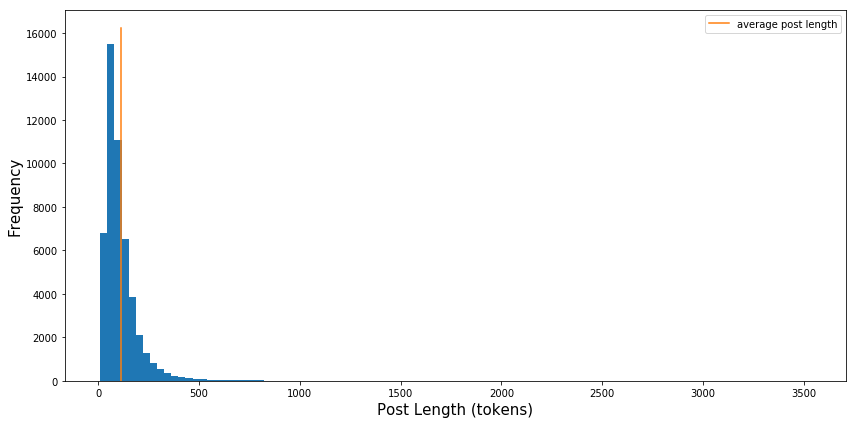

In [73]:
doc_analysis(corpus2, num_bins=100)